In [1]:
import pandas as pd

df = pd.read_csv('./Data/exam_sample.csv')
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [2]:
# 반별로 그룹화(A,B,C)
# 반별 그룹 오브젝트만 생성
df1 = df.groupby(['class'])
df1

In [3]:
# 반 중 A반만 그룹 확인
df1.get_group('A')


,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m


In [4]:
# 반별 그룹 평균
df.groupby('class').mean()

,student_no,science,english,math
class,,,,
A,2.5,61.50,94.75,46.25
B,6.5,58.25,84.25,77.50
C,9.5,30.00,95.50,35.00


In [5]:
# 반별/성별/그룹/평균확인
df.groupby(['class','sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  40.0
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.0
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  35.0

In [6]:
# 반별 수학 평균
df['math'].groupby(df['class']).mean()

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64

In [7]:
df.groupby(df['class'])['math'].mean()

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64

In [8]:
# 반별 수학 개수
df['math'].groupby(df['class']).count()

class
A    4
B    4
C    2
Name: math, dtype: int64

In [9]:
df_mean = df['math'].groupby(df['sex']).mean()
df_mean

sex
m    52.500000
w    59.166667
Name: math, dtype: float64

In [10]:
# 성별 수학 평균
sexgroup = df.groupby('sex')
print(df_mean)
print(sexgroup)
print(sexgroup.groups)

sex
m    52.500000
w    59.166667
Name: math, dtype: float64
{'m': [0, 3, 5, 6], 'w': [1, 2, 4, 7, 8, 9]}


In [11]:
# 남학생 수학 평균
male = sexgroup.get_group('m')
subset = male[['sex','math']]
print(male)
print(subset)

   student_no class  science  english  math sex
0           1     A       50       98    50   m
3           4     A       58       98    30   m
5           6     B       98       89    50   m
6           7     B       45       90    80   m
  sex  math
0   m    50
3   m    30
5   m    50
6   m    80


# 데이터 재구조화
- 데이터 구간화 <br>
pd.cut(),pd.qcut()<br>
- 원-핫 인코딩<br>
pd.get_dummies<br>
- 데이터 전치<br>
T<br>
- 피봇테이블<br>
pivot(),pd.pivot_table()<br>
- 열,행 전환 <br>
melt() <br>
- 행,열 인덱스 전환 <br>
stack(),unstack()


In [13]:
# 데이터 구간화
# pd.cut() : 동일 길이로 범주화
# pd.qcut() : 동일 개수로 범주화

# 판다스 라이브러리 불러오기
import pandas as pd

# 파일 경로를 찾고 변수 file_path에 저장
file_path =pd.read_csv('./Data/exam_sample.csv')

df = file_path
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [18]:
# math 변수에 대해 3개 동일한 길이로 범주형 변수로 만들기

df1 = pd.cut(df.math,3)
df1
# 변수를 3개 4개 5개 등 으로 범주화 할 수 있다.


0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

In [19]:
# math 변수에 3개 구간의 범주를 그룹 함수를 추가해서 각 범주의 그룹별로
# age()함수인 개수 , 평군 , 표준 편차 , 최솟값 , 최댓값 을 계산

df2 = df.math.groupby(df1)
df3 = df2.agg(['count','mean','std','min','max'])
df3

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


In [20]:
# pd.qcut() 함수를 사용해서 범주 구간별로 동일하게 3개의 개수를 가지도록 범주화

df4 = pd.qcut(df.math,3,labels=False)
df4

0    0
1    1
2    0
3    0
4    2
5    0
6    2
7    2
8    0
9    0
Name: math, dtype: int64

In [21]:
# 순서로 할당

import numpy as np

df5 = pd.qcut(df.math,3,labels=np.arange(3,0,-1))
df5

0    3
1    2
2    3
3    3
4    1
5    3
6    1
7    1
8    3
9    3
Name: math, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [22]:
df6 = df.math.groupby(df5)
df7 = df6.agg(['count','mean','std','min','max'])
df7

,count,mean,std,min,max
math,,,,,
3,6,40.833333,12.812754,20,50
2,1,60.000000,NaN,60,60
1,3,86.666667,5.773503,80,90


# 범주형 자료 원-핫인코딩 : pd.get_dummies(df)

In [25]:
# 유형 확인
df.dtypes

student_no     int64
class         object
science        int64
english        int64
math           int64
sex           object
dtype: object

# 범주형 원- 핫 코딩

In [26]:
df = pd.get_dummies(df)
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,50,1,0,0,1,0
1,2,60,97,60,1,0,0,0,1
2,3,78,86,45,1,0,0,0,1
3,4,58,98,30,1,0,0,1,0
4,5,65,80,90,0,1,0,0,1
5,6,98,89,50,0,1,0,1,0
6,7,45,90,80,0,1,0,1,0
7,8,25,78,90,0,1,0,0,1
8,9,15,98,20,0,0,1,0,1
9,10,45,93,50,0,0,1,0,1


# 데이터 전치 df.T


In [30]:
# 원 데이터
df =file_path
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [31]:
# 전치 데이터
df.T

,0,1,2,3,4,5,6,7,8,9
student_no,1,2,3,4,5,6,7,8,9,10
class,A,A,A,A,B,B,B,B,C,C
science,50,60,78,58,65,98,45,25,15,45
english,98,97,86,98,80,89,90,78,98,93
math,50,60,45,30,90,50,80,90,20,50
sex,m,w,w,m,w,m,m,w,w,w


# 피봇 테이블

df.pivot(index,columns,values) <br>
df.pivot_table(data,index,columns,values,aggfunc)

In [33]:
#  데이터 프레임 확인
df
# 반(class) 변수를 행 데이터로 피봇
pd.pivot_table(df,index='class',columns='sex',values='science')

sex,m,w
class,,
A,54.0,69.0
B,71.5,45.0
C,NaN,30.0


In [34]:
# 성별(sex) 변수를 행 데이터로 피봇
pd.pivot_table(df,index = 'sex',columns='class',values='science')

class,A,B,C
sex,,,
m,54.0,71.5,NaN
w,69.0,45.0,30.0


# melt 멜트 
열을 줄이고 행일 늘어남

In [35]:
# pd.melt(df,id_vars=['id1','id2'...])

# 멜트 함수
pd.melt(df,id_vars=['student_no','class'])

,student_no,class,variable,value
0,1,A,science,50
1,2,A,science,60
2,3,A,science,78
3,4,A,science,58
4,5,B,science,65
5,6,B,science,98
6,7,B,science,45
7,8,B,science,25
8,9,C,science,15
9,10,C,science,45


# 스택 / 언스택
행 인덱스와 열 인덱스 교환시 사용하는 기능 <br>
- stack 열이 행으로 변함 ( 열 인덱스가 반시계 방향으로 90도 회전한 것과 같은모양)
- 언스택은 행인덱스가 열로 변환하는데 행 인덱스가 시계방향으로 90도 회전한것과 유사

In [36]:
# 열 인덱스를 행 인덱스로 변환 : stack()
# 행 인덱스를 열 인덱스로 변환 : unstack()

# 스택
df5 = df.stack()
# 스택후 데이터 프레임은 인데긋 레벨 3개 있는 멀티 인데스가 된다,
df5

0  student_no     1
   class          A
   science       50
   english       98
   math          50
   sex            m
1  student_no     2
   class          A
   science       60
   english       97
   math          60
   sex            w
2  student_no     3
   class          A
   science       78
   english       86
   math          45
   sex            w
3  student_no     4
   class          A
   science       58
   english       98
   math          30
   sex            m
4  student_no     5
   class          B
   science       65
   english       80
   math          90
   sex            w
5  student_no     6
   class          B
   science       98
   english       89
   math          50
   sex            m
6  student_no     7
   class          B
   science       45
   english       90
   math          80
   sex            m
7  student_no     8
   class          B
   science       25
   english       78
   math          90
   sex            w
8  student_no     9
   class          C


In [37]:
# 스택으로 위에서 아래로 높게 올린 데이터프레임을 가지고 
#  거꾸로 왼쪽으로 오른쪽으로 넓게 언스택으로 펼쳐보기

df6 = df.unstack(level=-1)
df6

student_no  0     1
            1     2
            2     3
            3     4
            4     5
            5     6
            6     7
            7     8
            8     9
            9    10
class       0     A
            1     A
            2     A
            3     A
            4     B
            5     B
            6     B
            7     B
            8     C
            9     C
science     0    50
            1    60
            2    78
            3    58
            4    65
            5    98
            6    45
            7    25
            8    15
            9    45
english     0    98
            1    97
            2    86
            3    98
            4    80
            5    89
            6    90
            7    78
            8    98
            9    93
math        0    50
            1    60
            2    45
            3    30
            4    90
            5    50
            6    80
            7    90
            8    20
            9    50


# 시계열 데이터
- 시계열 시간 조작 단위는 ' 년 월 일 시 분 초'<br>
- Timestamp와 Perid의 차이 확인 Timestamp를 Period로 변환

In [40]:
# Period 객체는 to_period(freq ='기간인수')를 통해 datetime 변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할때 주로 활용

# datetime 유형에 대해서만 적용가능

# 시간정의
dates = ['2020-10-01','2020-03-01','2021-09-01']
dates

# 시간 자료형 생성
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-10-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [41]:
# Timestamp를 Period 변환
pr_day =ts_dates.to_period(freq='D') # 1일기간
pr_day

PeriodIndex(['2020-10-01', '2020-03-01', '2021-09-01'], dtype='period[D]', freq='D')

In [42]:
pr_month = ts_dates.to_period(freq='M') # 1개월 ㅣ간
pr_month

PeriodIndex(['2020-10', '2020-03', '2021-09'], dtype='period[M]', freq='M')

In [45]:
pr_year = ts_dates.to_period(freq='A')
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')

# 타임 스탬프
판다스에서 시계열 자료를 사용하려면 먼저 인덱스를 datetime 인덱스 자료형으로 만들어야 한다.<br>
datetime 인덱스는 특정한 시점을 기록한 타임스탬프 형식의 시계열 자료를 다루기 위한 특별한 인덱스다. <br>
타임 인덱스의 라벨 값이 반드시 일정한 간격일 필요는 없다 <br>
datetime 인덱스는 다음 함수를 사용하여 생성한다 
pd.to_datetime 함수를 사용하여 날짜 /시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 datetimeIndex 자료형 인덱스를 생성


In [46]:
# pd.to_datetime() : 시계열 객체로 변환

# 판다스 라이브러리 불러오기
import pandas as pd
#파일 경로를 찾고 변수 file_path에 저장
file_path = pd.read_csv('./Data/timeseries.csv')

df=file_path
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [49]:
# 데이터 유형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [51]:
# 현재 날짜를 나타내는 Date 컬럼은 문자형 이므로 to_datetime() 함수를 이용해서 date 컬럼을 시계열 객체로 변환후 확인
df['new_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


In [52]:
# 데이터 프레임 확인
print(df.head())
print('\n')

         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [53]:
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes
None


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [54]:
# 기존 Date 열 삭제
df.drop('Date',axis=1,inplace=True)

In [58]:
# new_Date를 인덱스로 지정
df.set_index('new_Date',inplace=True)
# 인덱스가 DatetimeIndex 변경되었고 2015년7월2일에서 2019년06월26일 사이에 5개 날짜가 있음


KeyError: "None of ['new_Date'] are in the columns"

In [57]:
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


<AxesSubplot:xlabel='new_Date'>

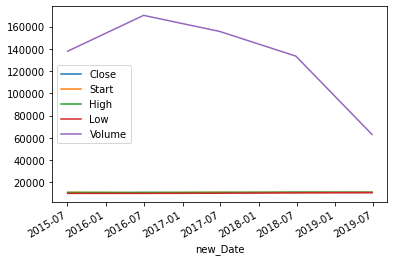

In [63]:
# 간단하게 시계열 시각화
import matplotlib as plt

df.plot()



# 기간 함수

In [ ]:
# pd.date_range() :시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스르 생성
# pd.period_range() : Period는 기간을 나타내는 자료형이며 , 배열을 적용할 때 freq=옵션은 기간의 단위를 의미

In [65]:
# 타임스탬프를 배열하는 date_range() 는 파이썬 내장 함수 range() 함수와 비슷한 개념
import numpy as np

# pd.date_range()을 사용해 날짜 값들을 만들어 전달
dates = pd.date_range('20200101',periods=6)

# 컬럼 이름의 이름은 A,B,C,D 라는 이름이 담긴 리스트에 추가
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,0.129151,0.659934,-0.145516,1.099418
2020-01-02,0.216851,-0.700145,0.283341,-0.857561
2020-01-03,-2.087596,-1.188901,1.953853,-0.849444
2020-01-04,-1.199593,-0.074918,-1.251897,-0.082507
2020-01-05,0.058824,-1.548887,1.130537,-0.048171
2020-01-06,0.497920,-1.157341,-1.234025,2.116921


In [66]:
# 시계열 활용 날짜 데이터 분리
# dt.year,dt.month,dt.day

import pandas as pd

file_path = pd.read_csv('./Data/timeseries.csv')

df = file_path
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [67]:
# 시간변수 추가
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [68]:
# 년 , 월 , 일 , 시간 추출
df['Year']= df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['day']=df['new_Date'].dt.day
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [70]:
# to_period() 함수를 이용해 표기 변경
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A') # 연도까지
df['Date_m']= df['new_Date'].dt.to_period(freq='M') #연월 까지
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,day,Date_yr,Date_m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06


In [71]:
# 날짜 인덱스 지정
df.set_index('new_Date',inplace=True)
df

,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06


In [72]:
# 날짜 인덱싱
df.loc['2015-07'] #7월에 해당하는 row 인덱싱

,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07


In [73]:
df['2015-06-25':'2018-06-20'] #해당기간 인덱싱

,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06


In [75]:
# 오늘 날짜와 차이 열 추가
# 즉 현재 날짜 - 기준 인덱스
today = pd.to_datetime('2020-03-18')
df['time_diff']=today-df.index
df

,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_yr,Date_m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,1721 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,1358 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,994 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,630 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,266 days


In [77]:
# 연습
today = pd.to_datetime(input())
df['time_diff']=today-df.index
df

2022-02-06


,Date,Close,Start,High,Low,Volume,Year,Month,day,Date_yr,Date_m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,2411 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,2048 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,1684 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,1320 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,956 days
